In [2]:
# Knn-Naive_Bayes-Logistic Regression Analysis


In [24]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, confusion_matrix, recall_score, accuracy_score, precision_score, roc_auc_score, roc_curve
from sklearn.preprocessing import MinMaxScaler

In [4]:
# read data
raw_data = pd.read_csv("titanic/train.csv")

In [6]:
# show data head
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# show info
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# compare shape and info values
raw_data.shape

(891, 12)

In [9]:
# null values
raw_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# cabin values are too much to fill, so get rid of this col :)
# first of all copy the data
pr_data = raw_data.copy()

In [11]:
pr_data.drop(columns=["Cabin"], inplace=True)
pr_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [12]:
# we'll fill na values where values are in Age col
# look Age mean and median
median = pr_data.Age.median()
mean = pr_data.Age.mean()
print(f"median : {median}, mean : {mean}")

median : 28.0, mean : 29.69911764705882


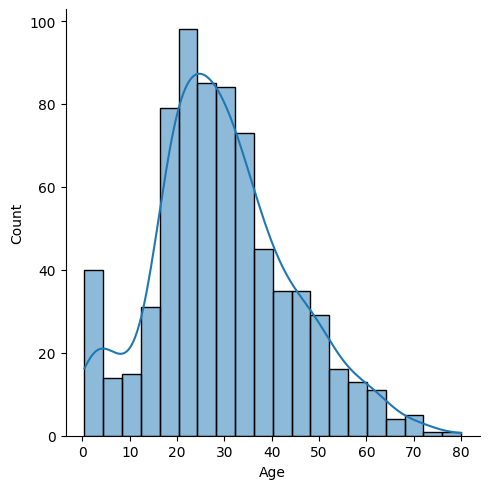

In [13]:
# show dist plot of age
sns.displot(x=pr_data.Age, kde=True)
plt.show()

In [14]:
# closer to 25 is better
# so we will use median
pr_data.Age.fillna(median, inplace=True)

In [15]:
# check na values again
pr_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [17]:
# lastly fill embarked value with most
max_class = pr_data.Embarked.value_counts().idxmax()

In [19]:
# fill it
pr_data.Embarked.fillna(max_class, inplace=True)
pr_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [20]:
# so check data
pr_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_27976\4034582921.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(pr_data.corr(), annot=True)


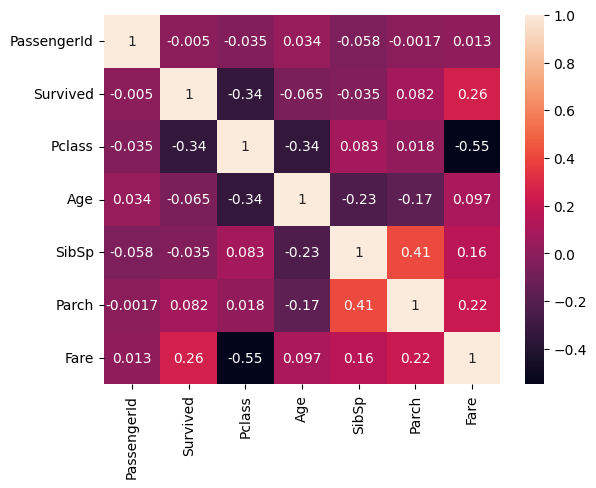

In [22]:
sns.heatmap(pr_data.corr(), annot=True)
plt.show()

In [23]:
# parch and sibsp cols are very related, so ı wanna drop this columns
# but we have to add a col to include both of them
# future engineering
pr_data["alone_passengers"] = np.where((pr_data.SibSp + pr_data.Parch > 0), 0, 1)
pr_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,alone_passengers
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1


In [25]:
# lets drop unsuable cols
drop_cols = ["PassengerId", "Name", "SibSp", "Parch", "Ticket"]
pr_data.drop(columns=drop_cols, inplace=True)
pr_data

,Survived,Pclass,Sex,Age,Fare,Embarked,alone_passengers
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,0
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,0
4,0,3,male,35.0,8.0500,S,1
...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,1
887,1,1,female,19.0,30.0000,S,1
888,0,3,female,28.0,23.4500,S,0
889,1,1,male,26.0,30.0000,C,1


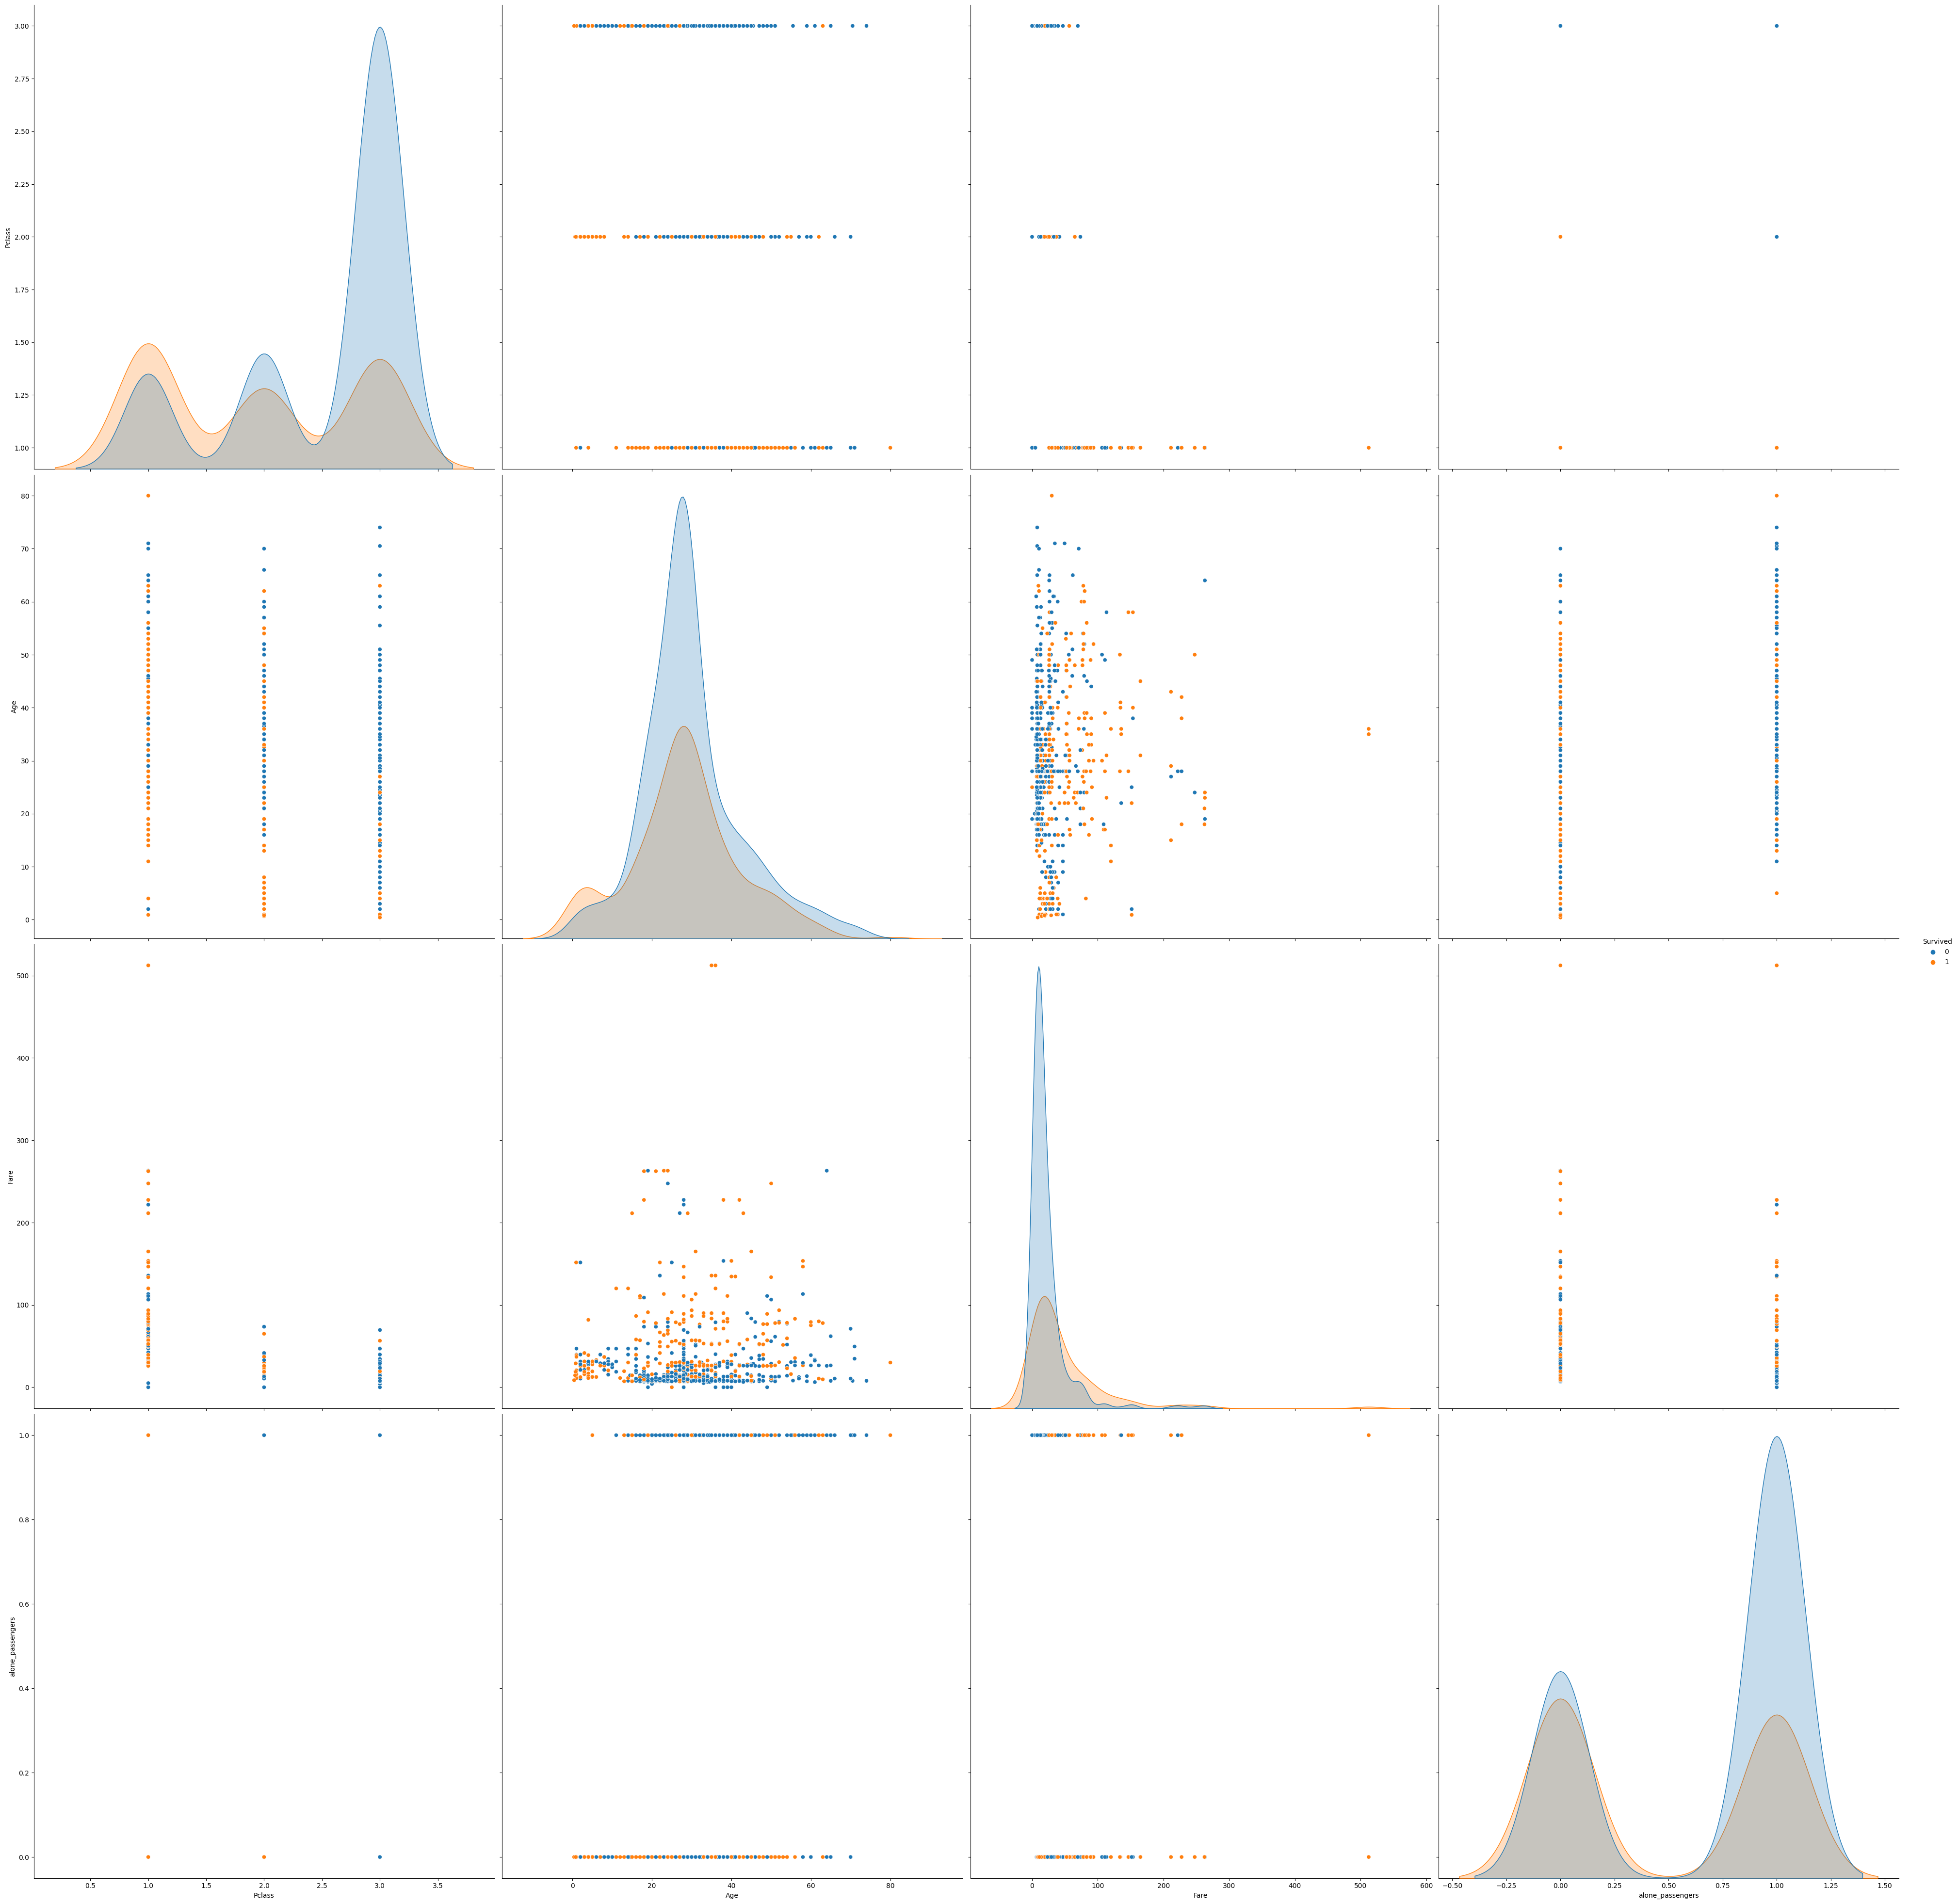

In [26]:
# so our data's values needs to be scaled
# let's check the relation between values like clusters
sns.pairplot(pr_data, hue="Survived", height=10)
plt.show()

In [27]:
# train and split section
# extract data
y = pr_data.pop("Survived")
X = pr_data

In [28]:
# shape control
y.shape, X.shape

((891,), (891, 6))

In [29]:
# scaling process
scaler = MinMaxScaler()
scale_cols = ["Pclass", "Age", "Fare"]
X[scale_cols] = scaler.fit_transform(X[scale_cols])

In [30]:
X

,Pclass,Sex,Age,Fare,Embarked,alone_passengers
0,1.0,male,0.271174,0.014151,S,0
1,0.0,female,0.472229,0.139136,C,0
2,1.0,female,0.321438,0.015469,S,1
3,0.0,female,0.434531,0.103644,S,0
4,1.0,male,0.434531,0.015713,S,1
...,...,...,...,...,...,...
886,0.5,male,0.334004,0.025374,S,1
887,0.0,female,0.233476,0.058556,S,1
888,1.0,female,0.346569,0.045771,S,0
889,0.0,male,0.321438,0.058556,C,1


In [31]:
# get dummy for categorical data
dummy_cols = ["Sex", "Embarked"]
X = pd.get_dummies(data=X, columns=dummy_cols, drop_first=True)
X

,Pclass,Age,Fare,alone_passengers,Sex_male,Embarked_Q,Embarked_S
0,1.0,0.271174,0.014151,0,1,0,1
1,0.0,0.472229,0.139136,0,0,0,0
2,1.0,0.321438,0.015469,1,0,0,1
3,0.0,0.434531,0.103644,0,0,0,1
4,1.0,0.434531,0.015713,1,1,0,1
...,...,...,...,...,...,...,...
886,0.5,0.334004,0.025374,1,1,0,1
887,0.0,0.233476,0.058556,1,0,0,1
888,1.0,0.346569,0.045771,0,0,0,1
889,0.0,0.321438,0.058556,1,1,0,0


In [32]:
# from now on we can split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=5)

In [33]:
# shape controls
X_train.shape, X_test.shape

((712, 7), (179, 7))

In [34]:
# shape y
y_train.shape, y_test.shape

((712,), (179,))

In [35]:
# until this section, preprocessing section accomplished
# we can run all models with preprocessed data

In [38]:
# for metrics control create a function to control them
def metrics_controller(test_data, predicted_data):
    
    accuracy = accuracy_score(test_data, predicted_data)
    
    recall = recall_score(test_data, predicted_data)
    
    precision = precision_score(test_data, predicted_data)
    
    f1 = f1_score(test_data, predicted_data)
    
    confusion_mat = confusion_matrix(test_data, predicted_data)
    
    roc_auc_scr = roc_auc_score(test_data, predicted_data)
    
    # plotting with roc auc curve
    fp, tp, thresh = roc_curve(test_data, predicted_data)
    plt.plot(fp, tp, label="fpr-tpr", color="m")
    plt.plot([0, 1], [0, 1], label="Null-Accuracy-rate", color="r")
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.legend()
    plt.show()
    
    # print all values
    print(f" accuracy :{accuracy}\n recall :{recall}\n precision :{precision}\n f1 :{f1}\n confusion_matrix {confusion_mat}\nroc_auc_score :{roc_auc_score}\n")

In [39]:
# logistic reg
def log_reg(train_data, label_data):
    log_reg = LogisticRegression(solver="liblinear", random_state=5)
    log_reg.fit(train_data, label_data)
    prediction = log_reg.predict(X_test)
    metrics_controller(y_test, prediction)

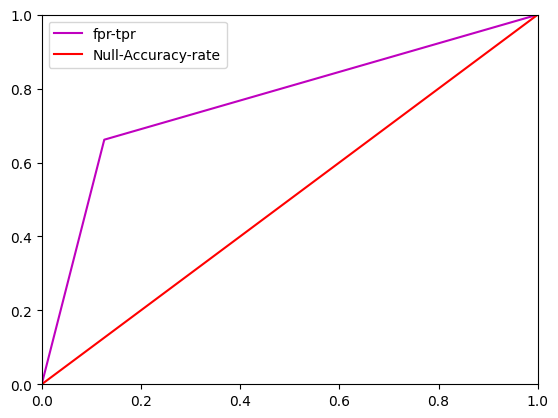

 accuracy :0.7932960893854749
 recall :0.6617647058823529
 precision :0.7627118644067796
 f1 :0.7086614173228345
 confusion_matrix [[97 14]
 [23 45]]
roc_auc_score :<function roc_auc_score at 0x0000014D275B6050>



In [40]:
log_reg(X_train, y_train)

In [41]:
def knn(train, label, k):
    knn_ = KNeighborsClassifier(n_neighbors=k)
    knn_.fit(train, label)
    prediction = knn_.predict(X_test)
    
    metrics_controller(y_test, prediction)

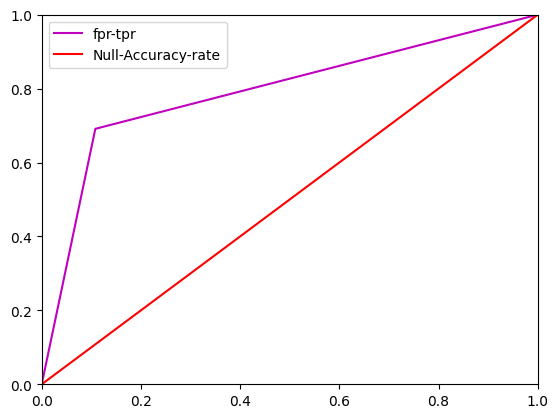

 accuracy :0.8156424581005587
 recall :0.6911764705882353
 precision :0.7966101694915254
 f1 :0.7401574803149606
 confusion_matrix [[99 12]
 [21 47]]
roc_auc_score :<function roc_auc_score at 0x0000014D275B6050>



In [42]:
knn(X_train, y_train, 5)

In [45]:
def naive_bayes(train, label):
    nav = GaussianNB()
    nav.fit(train, label)
    prediction = nav.predict(X_test)
    
    metrics_controller(y_test, prediction)

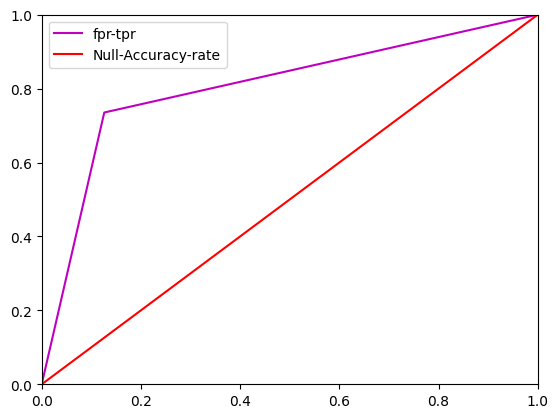

 accuracy :0.8212290502793296
 recall :0.7352941176470589
 precision :0.78125
 f1 :0.7575757575757576
 confusion_matrix [[97 14]
 [18 50]]
roc_auc_score :<function roc_auc_score at 0x0000014D275B6050>



In [46]:
naive_bayes(X_train, y_train)

In [47]:
## Cross Validation 
from sklearn.model_selection import RandomizedSearchCV
rsc = RandomizedSearchCV(estimator=KNeighborsClassifier(),
                        param_distributions={"n_neighbors":[1, 2, 3, 4, 5, 6, 7, 8, 9, 10 , 11, 12]},
                        cv=5,
                        n_iter=5,
                        verbose=1,
                        scoring="accuracy")

rsc.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=5,
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12]},
                   scoring='accuracy', verbose=1)

In [48]:
rsc.best_params_

{'n_neighbors': 12}

In [49]:
rsc.best_score_

0.8004924652811978

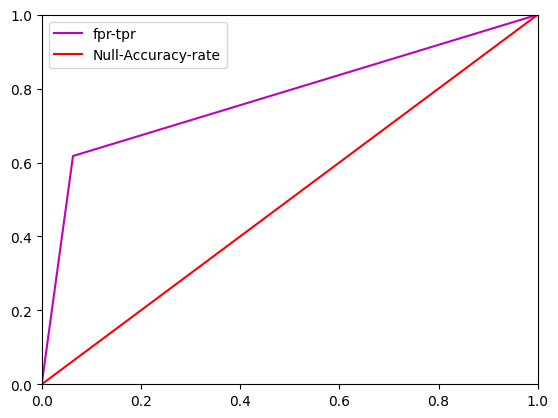

 accuracy :0.8156424581005587
 recall :0.6176470588235294
 precision :0.8571428571428571
 f1 :0.717948717948718
 confusion_matrix [[104   7]
 [ 26  42]]
roc_auc_score :<function roc_auc_score at 0x0000014D275B6050>



In [50]:
knn(X_train, y_train, k=12)